In [1]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Step 1: Load the dataset
data = pd.read_csv('Order1.csv')
data.head(20)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [10]:
# Assuming 'Member_number' is the identifier for each transaction and 'Item' is the product column
transactions = data.groupby('Member_number')['itemDescription'].apply(list).tolist()
transactions[2:10]

[['tropical fruit',
  'butter milk',
  'butter',
  'frozen vegetables',
  'sugar',
  'specialty chocolate',
  'whole milk',
  'other vegetables'],
 ['sausage',
  'root vegetables',
  'rolls/buns',
  'detergent',
  'frozen meals',
  'rolls/buns',
  'dental care',
  'rolls/buns'],
 ['other vegetables',
  'pip fruit',
  'root vegetables',
  'canned beer',
  'rolls/buns',
  'whole milk',
  'other vegetables',
  'hygiene articles',
  'whole milk',
  'whole milk',
  'frozen fish',
  'red/blush wine',
  'chocolate',
  'shopping bags',
  'dish cleaner',
  'packaged fruit/vegetables',
  'tropical fruit',
  'rolls/buns',
  'cling film/bags',
  'chocolate',
  'pastry'],
 ['whipped/sour cream', 'rolls/buns', 'margarine', 'rolls/buns'],
 ['whole milk',
  'frankfurter',
  'chicken',
  'frankfurter',
  'whole milk',
  'bottled water',
  'flour',
  'chocolate',
  'bottled beer',
  'rolls/buns',
  'rice',
  'softener',
  'shopping bags',
  'rolls/buns',
  'skin care'],
 ['hamburger meat',
  'tropical f

In [4]:
data.shape

(38765, 3)

In [5]:
# Step 3: Create a DataFrame for one-hot encoding
encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)
df = pd.DataFrame(onehot, columns=encoder.columns_)

print(df.shape)
df.head()

(3898, 167)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
print(onehot.shape)
print(onehot)

(3898, 167)
[[False False False ...  True  True False]
 [False False False ...  True False False]
 [False False False ...  True False False]
 ...
 [False False False ... False False False]
 [False False False ... False  True False]
 [False False False ... False False False]]


In [7]:
# Step 4: Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

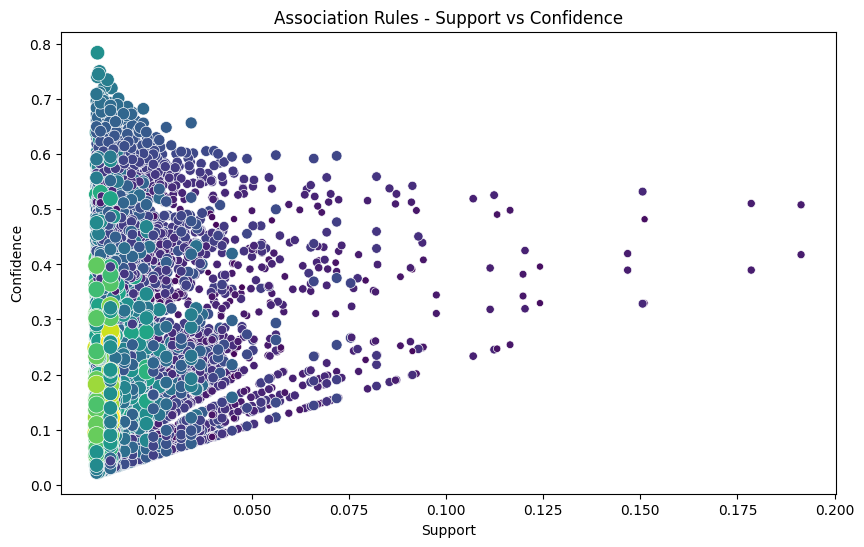

              antecedents                                        consequents  \
0              (UHT-milk)                                             (beef)   
1                  (beef)                                         (UHT-milk)   
2              (UHT-milk)                                     (bottled beer)   
3          (bottled beer)                                         (UHT-milk)   
4              (UHT-milk)                                    (bottled water)   
...                   ...                                                ...   
15255  (other vegetables)             (whole milk, soda, rolls/buns, yogurt)   
15256        (whole milk)       (soda, other vegetables, rolls/buns, yogurt)   
15257        (rolls/buns)       (whole milk, other vegetables, soda, yogurt)   
15258            (yogurt)   (whole milk, soda, other vegetables, rolls/buns)   
15259              (soda)  (whole milk, other vegetables, rolls/buns, yog...   

        support  confidence      lift  

In [8]:
# Step 5: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 6: Visualize the rules
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='viridis', legend=False)
plt.title('Association Rules - Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Display rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])